In [43]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns

In [44]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [45]:
df = pd.read_csv("/Users/sewoongmoon/*Data/BankChurners.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [84]:
## 전처리 필요한 칼럼 추출
df1 = df[["Months_on_book","Total_Relationship_Count",'Card_Category','Attrition_Flag']]
df1

,Months_on_book,Total_Relationship_Count,Card_Category,Attrition_Flag
0,39,5,Blue,Existing Customer
1,44,6,Blue,Existing Customer
2,36,4,Blue,Existing Customer
3,34,3,Blue,Existing Customer
4,21,5,Blue,Existing Customer
...,...,...,...,...
10122,40,3,Blue,Existing Customer
10123,25,4,Blue,Attrited Customer
10124,36,5,Blue,Attrited Customer
10125,36,4,Blue,Attrited Customer


In [ ]:
# MinMax 적용

In [86]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
df1[["Min_max_Months_on_book","Min_max_Total_Relationship_Count"]]=minmax.fit_transform(df1[["Months_on_book","Total_Relationship_Count"]]) #0과 1사이의 값으로 치환
df1[:5]

<ipython-input-86-bc1f97c64296>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[["Min_max_Months_on_book","Min_max_Total_Relationship_Count"]]=minmax.fit_transform(df1[["Months_on_book","Total_Relationship_Count"]]) #0과 1사이의 값으로 치환
/Users/sewoongmoon/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,Months_on_book,Total_Relationship_Count,Card_Category,Attrition_Flag,Min_max_Months_on_book,Min_max_Total_Relationship_Count
0,39,5,Blue,Existing Customer,0.604651,0.8
1,44,6,Blue,Existing Customer,0.720930,1.0
2,36,4,Blue,Existing Customer,0.534884,0.6
3,34,3,Blue,Existing Customer,0.488372,0.4
4,21,5,Blue,Existing Customer,0.186047,0.8


In [ ]:
## 이상치 확인을 위해 그래프로 확인

<AxesSubplot:ylabel='Density'>

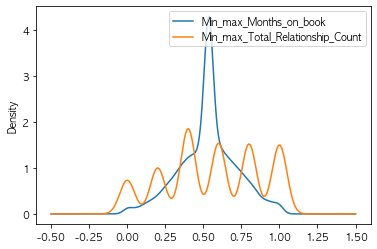

In [88]:
df1[["Min_max_Months_on_book","Min_max_Total_Relationship_Count"]].plot.kde()

In [89]:
## 맥스, 미니멈 값이 평균값에 크게 벗어나는지- i.e 이상치가 존재하는지 확인
maxes = df1.max()
maxes


Months_on_book                                     56
Total_Relationship_Count                            6
Card_Category                                  Silver
Attrition_Flag                      Existing Customer
Min_max_Months_on_book                            1.0
Min_max_Total_Relationship_Count                  1.0
dtype: object

In [90]:
mins = df1.min()
mins

Months_on_book                                     13
Total_Relationship_Count                            1
Card_Category                                    Blue
Attrition_Flag                      Attrited Customer
Min_max_Months_on_book                            0.0
Min_max_Total_Relationship_Count                  0.0
dtype: object

In [91]:
df1.isnull().sum(axis=0)

Months_on_book                      0
Total_Relationship_Count            0
Card_Category                       0
Attrition_Flag                      0
Min_max_Months_on_book              0
Min_max_Total_Relationship_Count    0
dtype: int64

In [92]:
df1.mean()

Months_on_book                      35.928409
Total_Relationship_Count             3.812580
Min_max_Months_on_book               0.533219
Min_max_Total_Relationship_Count     0.562516
dtype: float64

In [93]:
df1


,Months_on_book,Total_Relationship_Count,Card_Category,Attrition_Flag,Min_max_Months_on_book,Min_max_Total_Relationship_Count
0,39,5,Blue,Existing Customer,0.604651,0.8
1,44,6,Blue,Existing Customer,0.720930,1.0
2,36,4,Blue,Existing Customer,0.534884,0.6
3,34,3,Blue,Existing Customer,0.488372,0.4
4,21,5,Blue,Existing Customer,0.186047,0.8
...,...,...,...,...,...,...
10122,40,3,Blue,Existing Customer,0.627907,0.4
10123,25,4,Blue,Attrited Customer,0.279070,0.6
10124,36,5,Blue,Attrited Customer,0.534884,0.8
10125,36,4,Blue,Attrited Customer,0.534884,0.6


In [94]:
## 카드 카테고리를 숫자로 변환  {블루 :1 , 실버 :2, 골드: 3 , 플레티넘 :4 }
card_mapping = {'Blue':1, 'Silver':2, 'Gold':3, 'Platinum':4}

In [95]:
df1['Card'] = df1['Card_Category'].map(card_mapping)

<ipython-input-95-fb382b17e531>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Card'] = df1['Card_Category'].map(card_mapping)


In [96]:
df1

,Months_on_book,Total_Relationship_Count,Card_Category,Attrition_Flag,Min_max_Months_on_book,Min_max_Total_Relationship_Count,Card
0,39,5,Blue,Existing Customer,0.604651,0.8,1
1,44,6,Blue,Existing Customer,0.720930,1.0,1
2,36,4,Blue,Existing Customer,0.534884,0.6,1
3,34,3,Blue,Existing Customer,0.488372,0.4,1
4,21,5,Blue,Existing Customer,0.186047,0.8,1
...,...,...,...,...,...,...,...
10122,40,3,Blue,Existing Customer,0.627907,0.4,1
10123,25,4,Blue,Attrited Customer,0.279070,0.6,1
10124,36,5,Blue,Attrited Customer,0.534884,0.8,1
10125,36,4,Blue,Attrited Customer,0.534884,0.6,1


In [97]:
df1.dtypes

Months_on_book                        int64
Total_Relationship_Count              int64
Card_Category                        object
Attrition_Flag                       object
Min_max_Months_on_book              float64
Min_max_Total_Relationship_Count    float64
Card                                  int64
dtype: object

In [98]:
# df1['Card'] = df1['Card'].astype('category')

In [99]:
# df1.dtypes

<AxesSubplot:xlabel='Months_on_book', ylabel='Count'>

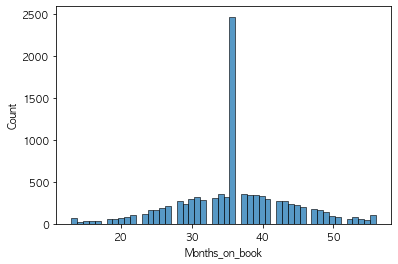

In [100]:
sns.histplot(df1["Months_on_book"])

In [ ]:
### 36개월이 많은 이유는? 

<AxesSubplot:xlabel='Total_Relationship_Count', ylabel='Count'>

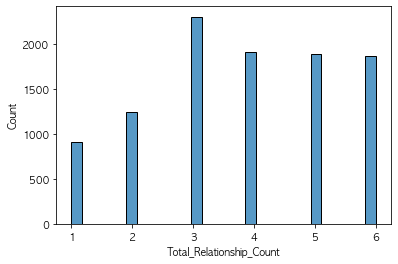

In [101]:
sns.histplot(df1["Total_Relationship_Count"])

<AxesSubplot:xlabel='Card_Category', ylabel='Count'>

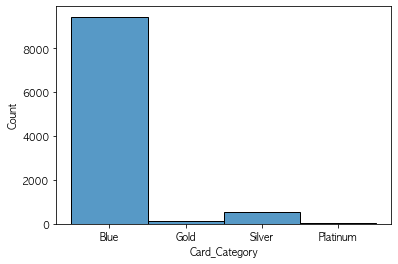

In [102]:
sns.histplot(df1["Card_Category"])

In [103]:

df1["Months_on_book"].value_counts()

36    2463
37     358
34     353
38     347
39     341
40     333
31     318
35     317
33     305
30     300
41     297
32     289
28     275
43     273
42     271
29     241
44     230
45     227
27     206
46     197
26     186
47     171
25     165
48     162
24     160
49     141
23     116
22     105
56     103
50      96
21      83
51      80
53      78
20      74
13      70
19      63
52      62
18      58
54      53
55      42
17      39
15      34
16      29
14      16
Name: Months_on_book, dtype: int64

In [105]:
df2 =df1.loc[df1['Months_on_book'] == 36]

In [107]:
df2['Attrition_Flag'].value_counts()

Existing Customer    2033
Attrited Customer     430
Name: Attrition_Flag, dtype: int64

<AxesSubplot:>

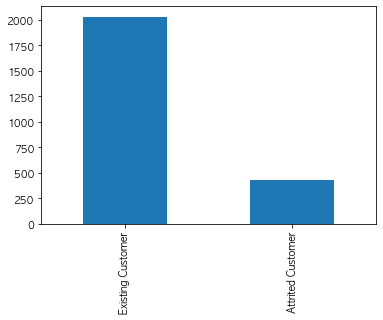

In [106]:
df2['Attrition_Flag'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

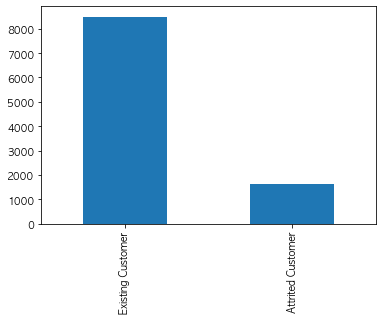

In [108]:
df1['Attrition_Flag'].value_counts().plot(kind = 'bar')

In [ ]:
# 큰 차이가 없으니 살려야 하나?

In [ ]:
plt.bar(x-0.2, y1, width, color='cyan')
plt.bar(x, y2, width, color='orange')
plt.bar(x+0.2, y3, width, color='green')
plt.xticks(x, ['Team A', 'Team B', 'Team C', 'Team D', 'Team E'])
plt.xlabel("Teams")
plt.ylabel("Scores")
plt.legend(["Round 1", "Round 2", "Round 3"])
plt.show()